# Deep Learning - Convolutional Neural Network (CNN)
* Author: Jeffery Brown
* Topic: Deep Learning
* GitHub Repo: https://github.com/daddyjab/DL_Notes


## <font color="blue">Summary</font>
This Jupyter Notebook provides explores image recognition using Convolutional Neural Networks (CNNs) implemented with Tensorflow and Keras.

# Dependencies - Standard

In [1]:
# Jeff's "standard" list of libraries to import  - overkill, but keeping them all for convenience... :)

%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd
from pandas.plotting import table
import math
import random
import datetime

from pprint import pprint


# Visualization
# import graphviz
# import pydotplus

from IPython.display import Image
# import IPython

# # Machine Learning - Data Preparation and Pre-Processing
# from sklearn.model_selection import train_test_split # Split data into training and testing samples
# from sklearn.model_selection import cross_val_score  # Score a model using k-fold or other cross validation

# from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
# from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
# from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

# from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
# from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# # Machine Learning - Sci-Kit Learn - Models - Regression
# from sklearn.linear_model import LinearRegression  # TBD
# from sklearn.linear_model import Lasso             # TBD
# from sklearn.linear_model import Ridge             # TBD
# from sklearn.linear_model import ElasticNet        # TBD

# # Machine Learning - Sci-Kit Learn - Models - Classification
# from sklearn.linear_model import LogisticRegression   # Logistic Regression Classifier
# from sklearn import tree                              # Decision Tree Classifier
# from sklearn.ensemble import RandomForestClassifier   # Random Forest Classifier
# from sklearn import svm                               # Support Vector Machine Classifier
# from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors (KNN)

# # Machine Learning - GridSearch for Hyper-Parameter tuning
# from sklearn.model_selection import GridSearchCV      # Grid Search

# # Machine Learning - Quantify Model Performance
# from sklearn.metrics import mean_squared_error    # Mean Squared Error (MSE) metric
# from sklearn.metrics import r2_score              # R-squared (Coefficient of Determination) metric
# from sklearn.metrics import confusion_matrix      # Generate a confusion matrix (actual vs. predicted counts)
# from sklearn.metrics import classification_report # Calculate metrics for prediction performance
# from sklearn.metrics import precision_score       # Calculate the precision: Tp / (Tp + Fp) => Ability to avoid false negatives
# from sklearn.metrics import recall_score          # Calculate the recall: Tp / (Tp + Fn) => Ability to find all positive samples
# from sklearn.metrics import f1_score              # Calculate the F1 score: 2*(precision*recall)/(precision+recall)

# # Machine Learning - Dataset Generation
# from sklearn.datasets import make_regression     # Generate linear data
# from sklearn.datasets import make_s_curve        # Generate nonlinear data
# from sklearn.datasets import make_blobs          # Generate blobs for classification
# from sklearn.datasets import make_circles        # Generate circles for classification
# from sklearn.datasets import load_iris           # Sample multi-class dataset for classification
# from sklearn.datasets import make_classification # Generate datasets for classification

# # Machine Learning - Keras (Tensorflow) - Models
# import keras                                        # Keras library
# from keras import backend as K                      # Abstracts the backend used by Keras [my config: Tensorflow]
# from keras.models import Sequential                 # Sequential model serving as foundation for neural network
# from keras.layers import Dense                      # Fully-connected NN layer
# from keras.layers import Dropout                    # Dropout regularization
# from keras.layers import Flatten                    # Reshapes from multidimensional activations to single dim
# from keras.layers import Conv2D                     # Convolution (2D)
# from keras.layers import MaxPooling2D               # Max pooling (2D)

# Machine Learning - Keras (Tensorflow) - Encoding
# from keras.utils import to_categorical            # One-Hot Encoder provided through Keras

# # Machine Learning - Keras (Tensorflow) - Other related Tools
# from keras.utils import plot_model                # Plot a neural network model
# from keras.models import load_model               # Load a saved machine learning model
# from keras.preprocessing import image             # Loads an image for application of machine learning
# from keras.preprocessing.image import img_to_array # Converts an image to a numpy array

# Machine Learning - Keras (Tensorflow) -  Dataset Generation
# from keras.datasets import mnist                  # Images: Handwritten digits 0-9 (28x28 grayscale, 60K train, 10K test)

# Machine Learning - Tensorflow (including Keras)
import tensorflow as tf
import tensorflow.keras as keras                    # Keras
from keras import backend as K                      # Abstracts the backend used by Keras [my config: Tensorflow]
from keras.models import Sequential                 # Sequential model serving as foundation for neural network
from keras.layers import Dense                      # Fully-connected NN layer
from keras.layers import Dropout                    # Dropout regularization
from keras.layers import Flatten                    # Reshapes from multidimensional activations to single dim
from keras.layers import Conv2D                     # Convolution (2D)
from keras.layers import MaxPooling2D               # Max pooling (2D)

Using TensorFlow backend.


# Dependencies - Local

In [36]:
# from Dataset_Support import (mnist_plot_digit_list, plot_examples)
from Dataset_Support import (plot_examples)

# CNN Example using Keras
* Reference: https://keras.io/examples/mnist_cnn/

In [37]:
# Import handwritten digit examples and split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = (x_train, y_train), (x_test, y_test)

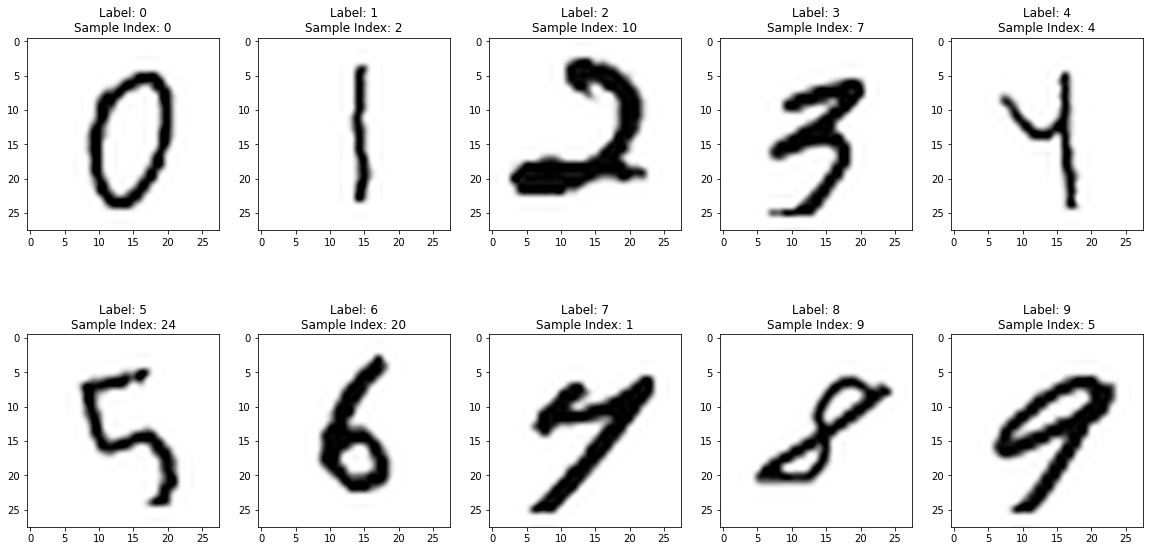

In [38]:
# n_disp = mnist_plot_digit_list( x_train_orig[1000:1100], y_train_orig[1000:1100], True)
n_disp = plot_examples( x_train_orig[1000:1100], y_train_orig[1000:1100], True)

# Prep Images for Training

In [39]:
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
print(x_train.shape, img_rows, img_cols)


(60000, 28, 28) 28 28


In [40]:
# Input image dimensions
m, n_img_rows, n_img_cols = x_train.shape
n_test = x_test.shape[0]

# These are grayscale images, so # of channels is 1
n_c = 1

# Number of classes: digits 0 through 9
num_classes = 10

# Reshape the inputs to the format needed by the backend
if tf.keras.backend.image_data_format() == 'channels_first':
    # Reshape the inputs to format: # Examples, # Channels, # Rows, # Cols
    x_train = x_train.reshape(m, 1, n_img_rows, n_img_cols)
    x_test = x_test.reshape(n_test, 1, n_img_rows, n_img_cols)
    input_shape = (1, n_img_rows, n_img_cols)
else:
    # Reshape the inputs to format: # Examples, # Rows, # Cols, # Channels
    x_train = x_train.reshape(m, n_img_rows, n_img_cols, 1)
    x_test = x_test.reshape(n_test, n_img_rows, n_img_cols, 1)
    input_shape = (n_img_rows, n_img_cols, 1)

print('x_train shape:', x_train.shape)
print(m, 'train samples')
print(n_test, 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [41]:
# Scale the input values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

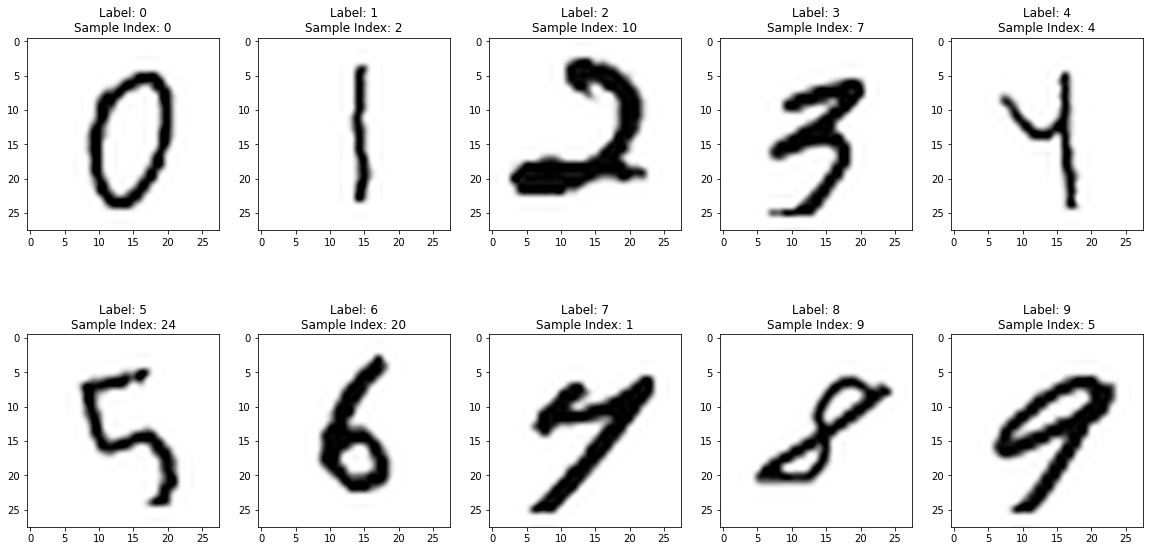

In [66]:
n_disp = plot_examples( x_train_orig[1000:1100], y_train_orig[1000:1100], True)

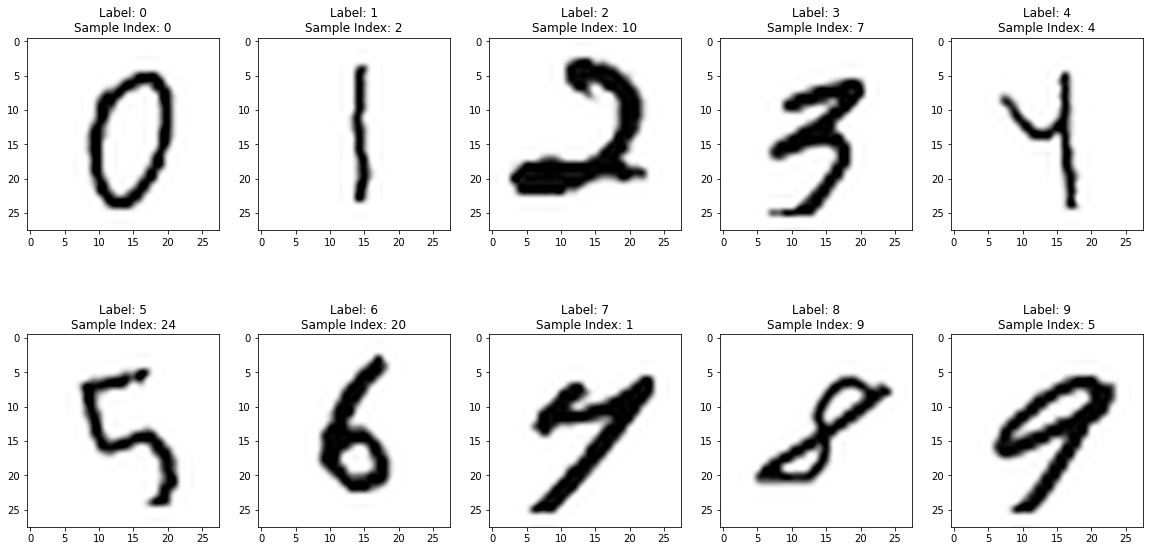

In [67]:
n_disp = plot_examples( x_train[1000:1100].squeeze(), y_train[1000:1100], True)

In [ ]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
# Hyperparameters
batch_size = 128

# Number of epochs to run
# epochs = 12
epochs = 1

In [ ]:
# Fit the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
# Evaluate model performance
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Show a summary of the model
model.summary()

In [ ]:
# Save the model
MODEL_FILEN='mnist_cnn_ex.h5'
# model.save(MODEL_FILEN)

In [ ]:
# Load a saved model
MODEL_FILEN='mnist_cnn_ex.h5'
#new_model = keras.models.load_model(MODEL_FILEN)